In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [47]:
data=pd.read_csv(r"C:\Users\ambad\Downloads\beer-servings.csv",index_col='Unnamed: 0')
data.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0.0,0.0,0.0,0.0,Asia
1,Albania,89.0,132.0,54.0,4.9,Europe
2,Algeria,25.0,0.0,14.0,0.7,Africa
3,Andorra,245.0,138.0,312.0,12.4,Europe
4,Angola,217.0,57.0,45.0,5.9,Africa


In [49]:
data1=data.copy()
data1.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0.0,0.0,0.0,0.0,Asia
1,Albania,89.0,132.0,54.0,4.9,Europe
2,Algeria,25.0,0.0,14.0,0.7,Africa
3,Andorra,245.0,138.0,312.0,12.4,Europe
4,Angola,217.0,57.0,45.0,5.9,Africa


In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 193 entries, 0 to 192
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       193 non-null    object 
 1   beer_servings                 185 non-null    float64
 2   spirit_servings               185 non-null    float64
 3   wine_servings                 187 non-null    float64
 4   total_litres_of_pure_alcohol  192 non-null    float64
 5   continent                     193 non-null    object 
dtypes: float64(4), object(2)
memory usage: 10.6+ KB


In [51]:
data.describe()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
count,185.000000,185.000000,187.000000,192.000000
mean,105.124324,83.221622,50.165775,4.741667
std,100.524714,89.142958,80.358868,3.767654
min,0.000000,0.000000,0.000000,0.000000
25%,20.000000,4.000000,1.000000,1.300000
50%,76.000000,60.000000,9.000000,4.250000
75%,185.000000,132.000000,60.500000,7.200000
max,376.000000,438.000000,370.000000,14.400000


In [52]:
data.isna().sum()

country                         0
beer_servings                   8
spirit_servings                 8
wine_servings                   6
total_litres_of_pure_alcohol    1
continent                       0
dtype: int64

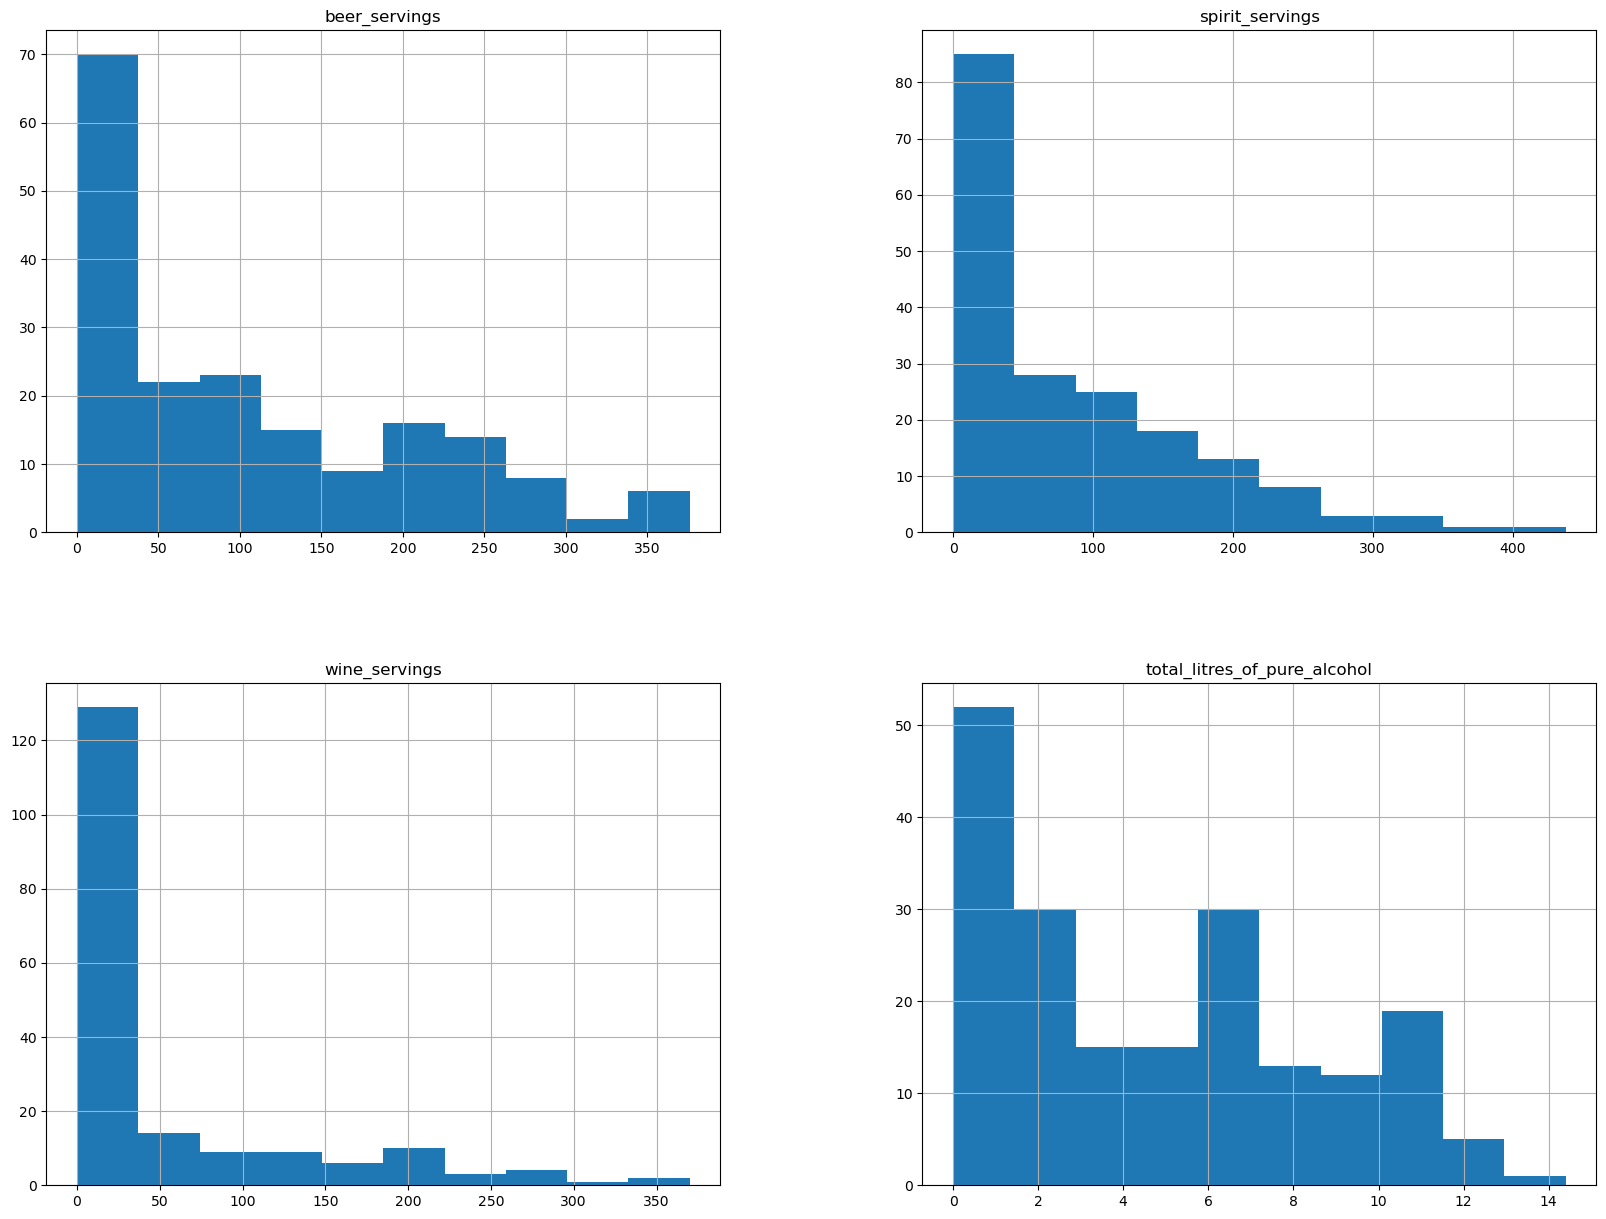

In [53]:
freqgraph = data.select_dtypes(include='float64')
freqgraph.hist(figsize=(20,15));

In [54]:
data['beer_servings'] = data['beer_servings'].fillna(data['beer_servings'].median())
data['spirit_servings'] = data['spirit_servings'].fillna(data['spirit_servings'].median())
data['wine_servings'] = data['wine_servings'].fillna(data['wine_servings'].median())
data['total_litres_of_pure_alcohol'] = data['total_litres_of_pure_alcohol'].fillna(data['total_litres_of_pure_alcohol'].median())

In [55]:
data.isna().sum()

country                         0
beer_servings                   0
spirit_servings                 0
wine_servings                   0
total_litres_of_pure_alcohol    0
continent                       0
dtype: int64

In [56]:
num_cols = ['beer_servings', 'spirit_servings', 'wine_servings', 'total_litres_of_pure_alcohol']


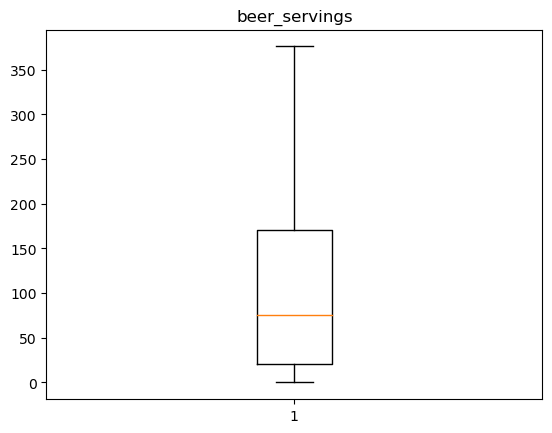

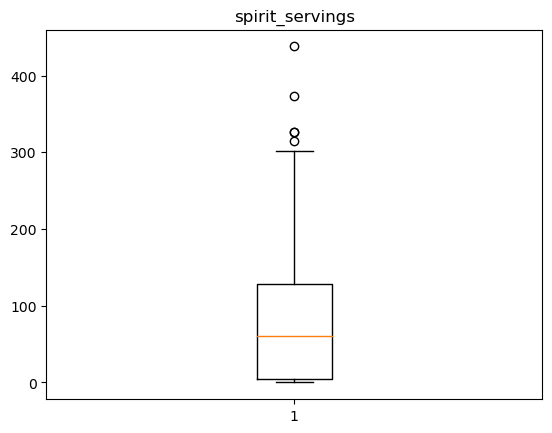

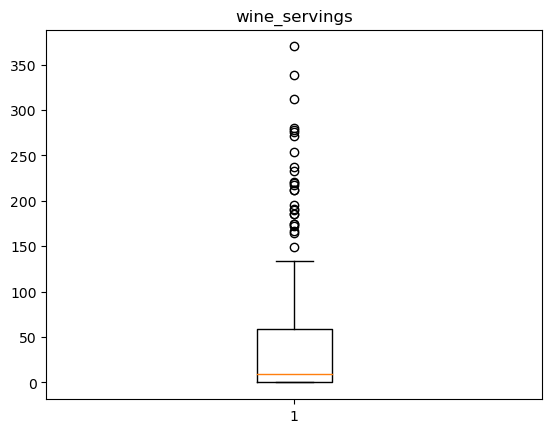

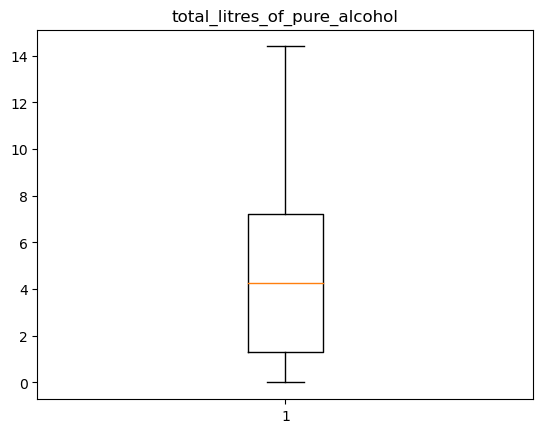

In [57]:
for i in num_cols:
  plt.figure()
  plt.boxplot(data[i])
  plt.title(i)

In [58]:
Q1 = np.percentile(data['wine_servings'],25,method='midpoint')
Q2 = np.percentile(data['wine_servings'],50,method='midpoint')
Q3 = np.percentile(data['wine_servings'],75,method='midpoint')

In [59]:
print("Q1 is ",Q1)
print("Q2 is ",Q2)
print("Q3 is ",Q3)

Q1 is  1.0
Q2 is  9.0
Q3 is  59.0


In [60]:
IQR = Q3-Q1
IQR

58.0

In [61]:
low_lim = Q1 - 1.5 * IQR
low_lim

-86.0

In [62]:
up_lim = Q3 + 1.5 * IQR
up_lim

146.0

In [63]:
outlier=[]
for x in data['wine_servings']:
  if((x > up_lim) or (x < low_lim)):
    outlier.append(x)

outlier

[312.0,
 221.0,
 212.0,
 191.0,
 212.0,
 172.0,
 254.0,
 278.0,
 233.0,
 370.0,
 149.0,
 175.0,
 218.0,
 185.0,
 165.0,
 237.0,
 271.0,
 190.0,
 175.0,
 339.0,
 167.0,
 276.0,
 186.0,
 280.0,
 195.0,
 220.0]

In [64]:
data['wine_servings'] = data['wine_servings'].clip(lower=low_lim , upper=up_lim)

In [65]:
outlier=[]
for x in data['wine_servings']:
  if((x > up_lim) or (x < low_lim)):
    outlier.append(x)

outlier

[]

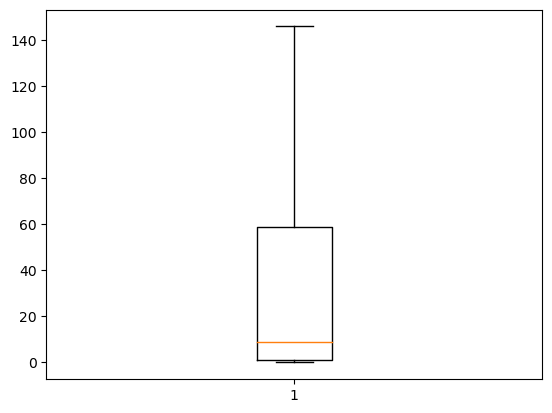

In [66]:
plt.boxplot(data['wine_servings'])
plt.show();

# OUTLIER DETECTION AND CORRECTION USING ZSCORE

In [67]:
import seaborn as sns

In [68]:
data2=data1.copy()
data2.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0.0,0.0,0.0,0.0,Asia
1,Albania,89.0,132.0,54.0,4.9,Europe
2,Algeria,25.0,0.0,14.0,0.7,Africa
3,Andorra,245.0,138.0,312.0,12.4,Europe
4,Angola,217.0,57.0,45.0,5.9,Africa


C:\Users\ambad\AppData\Local\Temp\ipykernel_17480\2156908199.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data1['wine_servings']);


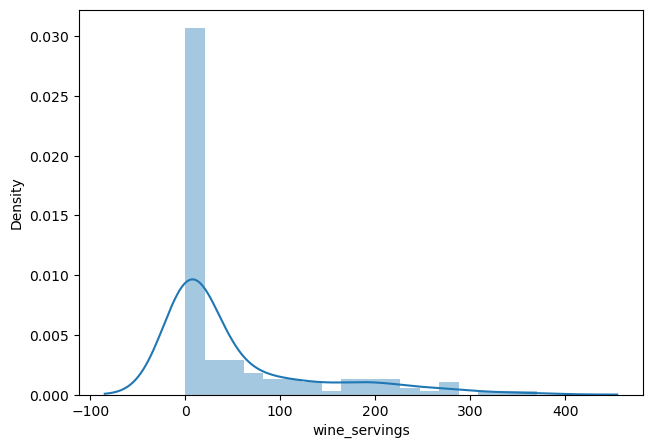

In [69]:
plt.figure(figsize=(16,5));
plt.subplot(1,2,1);
sns.distplot(data1['wine_servings']);

In [70]:
data1['wine_servings'].describe()

count    187.000000
mean      50.165775
std       80.358868
min        0.000000
25%        1.000000
50%        9.000000
75%       60.500000
max      370.000000
Name: wine_servings, dtype: float64

In [71]:
print('Highest allowed: ',data1['wine_servings'].mean() + 3*data1['wine_servings'].std())
print('Lowest allowed :',data1['wine_servings'].mean() - 3*data1['wine_servings'].std())

Highest allowed:  291.2423789034692
Lowest allowed : -190.9108281013302


In [73]:
outl =data1[(data1['wine_servings'] > 291.24) | (data1['wine_servings'] < -190.91)]

In [74]:
outl

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
3,Andorra,245.0,138.0,312.0,12.4,Europe
61,France,127.0,151.0,370.0,11.8,Europe
136,Portugal,194.0,NaN,339.0,11.0,Europe


In [75]:
new_outl =data1[(data1['wine_servings'] < 291.24) | (data1['wine_servings'] > -190.91)]

In [76]:
new_outl

#with out outlier

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0.0,0.0,0.0,0.0,Asia
1,Albania,89.0,132.0,54.0,4.9,Europe
2,Algeria,25.0,0.0,14.0,0.7,Africa
3,Andorra,245.0,138.0,312.0,12.4,Europe
4,Angola,217.0,57.0,45.0,5.9,Africa
...,...,...,...,...,...,...
188,Venezuela,NaN,100.0,3.0,7.7,South America
189,Vietnam,111.0,2.0,1.0,2.0,Asia
190,Yemen,6.0,0.0,0.0,0.1,Asia
191,Zambia,32.0,19.0,4.0,2.5,Africa


In [77]:
upper_limit = data1['wine_servings'].mean() + 3*data1['wine_servings'].std()
lower_limit = data1['wine_servings'].mean() - 3*data1['wine_servings'].std()

In [82]:
data1['wine_servings'].describe()

count    187.000000
mean      50.165775
std       80.358868
min        0.000000
25%        1.000000
50%        9.000000
75%       60.500000
max      370.000000
Name: wine_servings, dtype: float64

C:\Users\ambad\AppData\Local\Temp\ipykernel_17480\313691625.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data2['beer_servings']);


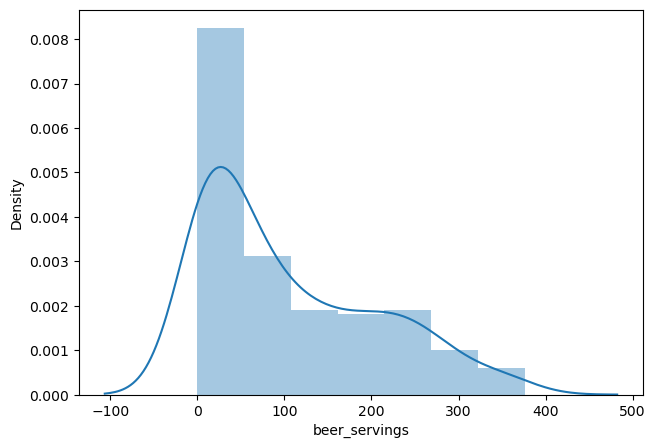

In [84]:
plt.figure(figsize=(16,5));
plt.subplot(1,2,1);
sns.distplot(data2['beer_servings']);

In [85]:
data2['beer_servings'].describe()

count    185.000000
mean     105.124324
std      100.524714
min        0.000000
25%       20.000000
50%       76.000000
75%      185.000000
max      376.000000
Name: beer_servings, dtype: float64

In [86]:
print('Highest allowed: ',data2['beer_servings'].mean() + 3*data2['beer_servings'].std())
print('Lowest allowed :',data2['beer_servings'].mean() - 3*data2['beer_servings'].std())

Highest allowed:  406.6984667768971
Lowest allowed : -196.4498181282484


In [87]:
out2 =data2[(data2['beer_servings'] > 406.69) | (data2['beer_servings'] < -196.44)]

In [88]:
out2

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent


# Spirit servings

C:\Users\ambad\AppData\Local\Temp\ipykernel_17480\352734670.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['spirit_servings']);


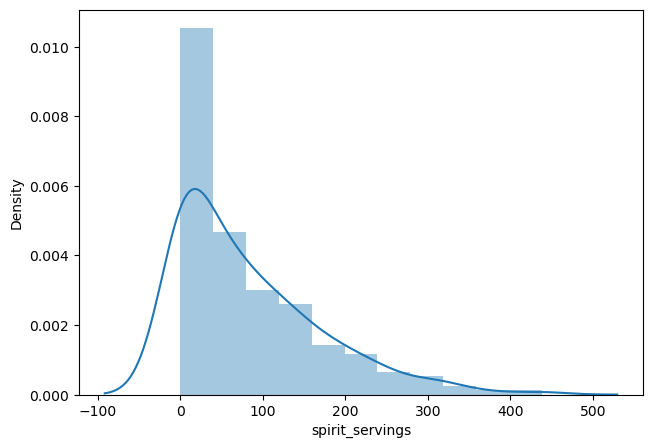

In [89]:
plt.figure(figsize=(16,5));
plt.subplot(1,2,1);
sns.distplot(data['spirit_servings']);

In [90]:
data2['spirit_servings'].describe()

count    185.000000
mean      83.221622
std       89.142958
min        0.000000
25%        4.000000
50%       60.000000
75%      132.000000
max      438.000000
Name: spirit_servings, dtype: float64

In [91]:
print('Highest allowed: ',data2['spirit_servings'].mean() + 3*data2['spirit_servings'].std())
print('Lowest allowed :',data2['spirit_servings'].mean() - 3*data2['spirit_servings'].std())

Highest allowed:  350.65049495324575
Lowest allowed : -184.20725171000248


In [92]:
out3 =data2[(data2['spirit_servings'] > 350.65) | (data2['spirit_servings'] < -184.20)]

In [93]:
out3

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
15,Belarus,142.0,373.0,42.0,14.4,Europe
68,Grenada,199.0,438.0,28.0,11.9,North America


In [94]:
new_out3 =data2[(data2['spirit_servings'] < 350.65) | (data2['spirit_servings'] > -184.20)]

In [95]:
new_out3

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0.0,0.0,0.0,0.0,Asia
1,Albania,89.0,132.0,54.0,4.9,Europe
2,Algeria,25.0,0.0,14.0,0.7,Africa
3,Andorra,245.0,138.0,312.0,12.4,Europe
4,Angola,217.0,57.0,45.0,5.9,Africa
...,...,...,...,...,...,...
188,Venezuela,NaN,100.0,3.0,7.7,South America
189,Vietnam,111.0,2.0,1.0,2.0,Asia
190,Yemen,6.0,0.0,0.0,0.1,Asia
191,Zambia,32.0,19.0,4.0,2.5,Africa


In [96]:
upper_limit = data2['spirit_servings'].mean() + 3*data2['spirit_servings'].std()
lower_limit = data2['spirit_servings'].mean() - 3*data2['spirit_servings'].std()

In [97]:
outlier=[]
for x in data2['spirit_servings']:
  if((x > upper_limit)or (x < lower_limit)):
    outlier.append(x)

outlier

[373.0, 438.0]

In [98]:
data2['spirit_servings'] = data2['spirit_servings'].clip(lower=lower_limit, upper=upper_limit)

In [99]:
data2['spirit_servings'].describe()

count    185.000000
mean      82.628654
std       87.080737
min        0.000000
25%        4.000000
50%       60.000000
75%      132.000000
max      350.650495
Name: spirit_servings, dtype: float64